In [1]:
print('#1.[8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero ''none'' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.')
import csv
from pandas import DataFrame
from pandas import Series
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
from matplotlib import pyplot as plt

#1.[8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero none values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.


In [2]:
f = 'GermanCredit.csv'
reader = csv.DictReader(open(f))
tDF = DataFrame(reader)
columns = tDF.keys()
noneCounter = defaultdict(list)
for key in columns:
    group = tDF[key].value_counts()
    if('none' in group):
        numNone = group['none']
        noneCounter[(numNone)].append(key)
noneCounter = sorted(noneCounter.items(),reverse = True)
deleted = 0
for num,cols in noneCounter:
    for col in cols:
        tDF.drop([col], axis = 1, inplace=True)
        deleted += 1
    if(deleted == 3):
        break
display(tDF)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [3]:
print('#2.[4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.')
cleanApost = lambda x:x.str.strip("'")
tDF = tDF.apply(cleanApost)
display(tDF)

#2.[4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [4]:
print("#3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.")
def part3(word):
    statusDict = {'no checking':'No Checking','<0':'Low','0<=X<200':'Medium', '>=200':'High'}
    return statusDict[word]
tDF['checking_status'] = tDF['checking_status'].map(part3)
display(tDF)

#3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [5]:
print("#4 [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').")
def part4(word):
    statusDict = {'no known savings':'No Savings', '<100':'Low', '100<=X<500':'Medium', '500<=X<1000':'High', '>=1000':'High'}
    return statusDict[word]
tDF['savings_status'] = tDF['savings_status'].map(part4)
display(tDF)

#4 [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [6]:
print("#5 [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.")
def part5(word):
    classDict = {'good':1,'bad':0}
    return classDict[word]
tDF['class'] = tDF['class'].map(part5)
display(tDF)

#5 [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [7]:
print("#6 [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range")
def part6(word):
    employmentDict = {'unemployed':'Unemployed','<1':'Amateur','1<=X<4':'Professional','4<=X<7':'Experienced','>=7':'Expert'}
    return employmentDict[word]
tDF['employment'] = tDF['employment'].map(part6)
display(tDF)

#6 [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [8]:
print("#1a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).")

fWorker = tDF['foreign_worker']
def part5RE(word):
    classDict = {1:'good',0:'bad'}
    return classDict[word]
classes = tDF['class'].map(part5RE)
crosstab1 = pd.crosstab(fWorker,classes,rownames=['Foreign Worker'], colnames=['Class'])
display(crosstab1)

#1a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).


Class,bad,good
Foreign Worker,,
no,4,33
yes,296,667


In [9]:
print("#1b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.")
savingStatus = np.array(tDF['savings_status'].values)
employments = np.array(tDF['employment'].values)
crosstab2 = pd.crosstab(employments,savingStatus,rownames=['Employment'], colnames=['Savings Status'])
display(crosstab2)

#1b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.


Savings Status,High,Low,Medium,No Savings
Employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [143]:
print("#2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.")
def part6RE(word):
    employmentDict = {'Unemployed':'unemployed','Amateur':'<1','Professional':'1<=X<4','Experienced':'4<=X<7','Expert':'>=7'}
    return employmentDict[word]

group = tDF[['personal_status','employment','credit_amount']].copy()
group['employment'] = group['employment'].map(part6RE)
group['credit_amount'] = group['credit_amount'].apply(lambda x: float(x))
group = group.loc[(group['employment'] == '4<=X<7') & (group['personal_status'] == 'male single')]
creditAmounts = np.array(group['credit_amount'].values)
creditsMean = creditAmounts.mean()
print(creditsMean)

#2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.
4142.592592592592


In [144]:
print("#3 [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.")

group = tDF[['duration','job']].copy()
group['duration'] = group['duration'].apply(lambda x: float(x))
durationDict = defaultdict(list)
for i,row in group.iterrows():
    durationDict[row[1]].append(row[0])
durationDict = dict(durationDict)
durationAvgs = {}
for job,dur in durationDict.items():
    durationAvgs[job] = sum(dur)/len(dur)
    print('Average duration for ' + job + ' ' + str(durationAvgs[job]))

#3 [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.
Average duration for skilled 21.41111111111111
Average duration for unskilled resident 16.535
Average duration for high qualif/self emp/mgmt 25.16891891891892
Average duration for unemp/unskilled non res 17.363636363636363


In [145]:
print("#4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status?")
checkingCounters = Counter()
checkingCounters.update(tDF['checking_status'].values)
print("Most common checking status: " + checkingCounters.most_common()[0][0])
savingsCounters = Counter()
savingsCounters.update(tDF['savings_status'].values)
print("Most common savings status: " + savingsCounters.most_common()[0][0])

#4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status?
Most common checking status: No Checking
Most common savings status: Low


#1. [9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.


<Figure size 576x576 with 0 Axes>

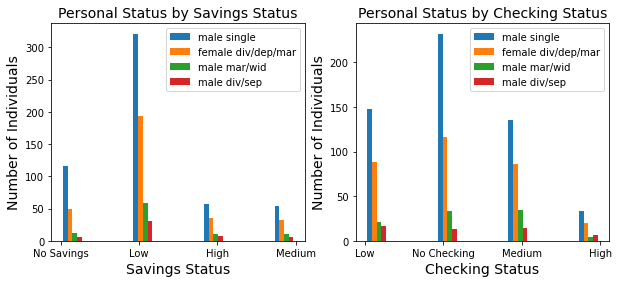

In [142]:
print("#1. [9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.")
statuses = tDF['personal_status'].value_counts().keys().values
statDictS = {}
statDictC = {}
plotDict = defaultdict(list)

for s in statuses:
    statusesS = tDF.loc[tDF['personal_status'] == s]['savings_status']
    statusesC = tDF.loc[tDF['personal_status'] == s]['checking_status']
    statDictS[s] = statusesS
    statDictC[s] = statusesC
plt.figure(figsize=(8,8))
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].set_xlabel("Savings Status",fontsize=14)
axes[0].set_ylabel("Number of Individuals",fontsize=14)
axes[0].set_title("Personal Status by Savings Status",fontsize=14)
axes[0].hist(statDictS.values())
axes[0].legend(statDictS.keys())
axes[1].set_xlabel("Checking Status",fontsize=14)
axes[1].set_ylabel("Number of Individuals",fontsize=14)
axes[1].set_title("Personal Status by Checking Status",fontsize=14)
axes[1].hist(statDictC.values())
axes[1].legend(statDictC.keys())
plt.show()

#2. [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).


Text(0, 0.5, 'Average Customer Age')

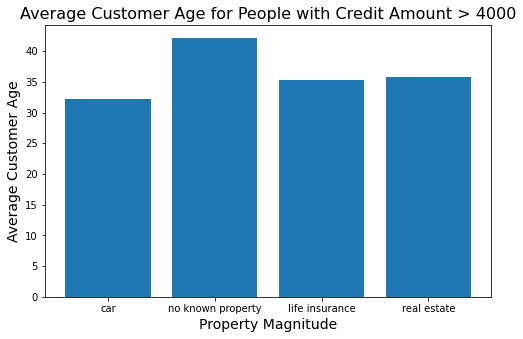

In [226]:
tDF['credit_amount'] = tDF['credit_amount'].apply(lambda x: int(x))
tDF['age'] = tDF['age'].apply(lambda x: int(x))
print("#2. [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).")
dataset2 = tDF.loc[tDF['credit_amount'] > 4000]
def avgDict(df):
    dDict = {}
    data = df['property_magnitude'].value_counts()
    for pm,c in data.items():
        dDict[pm] = sum(df.loc[df['property_magnitude'] == pm]['age'].values)/c
    return dDict
ageDict = avgDict(dataset2)
plt.figure(figsize=(8,5))
plt.bar(ageDict.keys(),ageDict.values())
plt.title("Average Customer Age for People with Credit Amount > 4000",fontsize=16)
plt.xlabel("Property Magnitude",fontsize=14)
plt.ylabel("Average Customer Age", fontsize=14)

#3. [6 pts] For people with a 'High' savings_status and age above 40, use subplots to plot the following pie charts:
Personal status
Credit history
Job


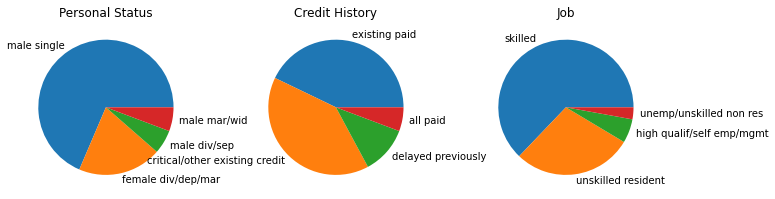

In [231]:
print("#3. [6 pts] For people with a 'High' savings_status and age above 40, use subplots to plot the following pie charts:\nPersonal status\nCredit history\nJob")
def makeData(df,field):
    data = df[field].value_counts()
    return data
dataset3 = tDF.loc[(tDF['savings_status'] == 'High') & (tDF['age'] > 40)]

def makePie(cht,sp,data,title):
    names = data.keys().values
    vals = data.values
    cht[sp].set_title(title)
    cht[sp].pie(vals,labels=names)
    
fig, axes = plt.subplots(1,3,figsize=(10,4))
fig.tight_layout(pad=3.0)
dset1 = makeData(dataset3,'personal_status') 
makePie(axes,0,dset1,'Personal Status')

dset2 = makeData(dataset3,'credit_history')
makePie(axes,1,dset2,'Credit History')

dset3 = makeData(dataset3,'job')
makePie(axes,2,dset3,'Job')
plt.savefig('plots.png')